In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

In [38]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("EJERCICIO 3: CLUSTERING - SEGMENTACIÓN DE CLIENTES")

EJERCICIO 3: CLUSTERING - SEGMENTACIÓN DE CLIENTES


In [39]:
print("\n 1 Cargando dataset...")
df = pd.read_csv(r"C:\Users\yanny\Downloads\cliente_tienda.csv")

print(f" Dataset cargado exitosamente")
print(f"  - Filas: {df.shape[0]}")
print(f"  - Columnas: {df.shape[1]}")


 1 Cargando dataset...
 Dataset cargado exitosamente
  - Filas: 200
  - Columnas: 5


In [40]:
print("\n 2 Exploración inicial de datos")
print("\nPrimeras 10 filas:")
display(df.head(10))

print("\nInformación del dataset:")
df.info()

print("\nEstadísticas descriptivas:")
display(df.describe())

print("\nValores nulos por columna:")
print(df.isnull().sum())

print("\nDistribución de género:")
print(df['Genero'].value_counts())


 2 Exploración inicial de datos

Primeras 10 filas:


,CustomerID,Genero,Edad,Ingresos Anuales ($),Porcentajde de gastos (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   CustomerID                     200 non-null    int64 
 1   Genero                         200 non-null    object
 2   Edad                           200 non-null    int64 
 3   Ingresos Anuales ($)           200 non-null    int64 
 4   Porcentajde de gastos (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Estadísticas descriptivas:


,CustomerID,Edad,Ingresos Anuales ($),Porcentajde de gastos (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000



Valores nulos por columna:
CustomerID                       0
Genero                           0
Edad                             0
Ingresos Anuales ($)             0
Porcentajde de gastos (1-100)    0
dtype: int64

Distribución de género:
Genero
Female    112
Male       88
Name: count, dtype: int64



 3 Análisis Exploratorio de Datos (EDA)


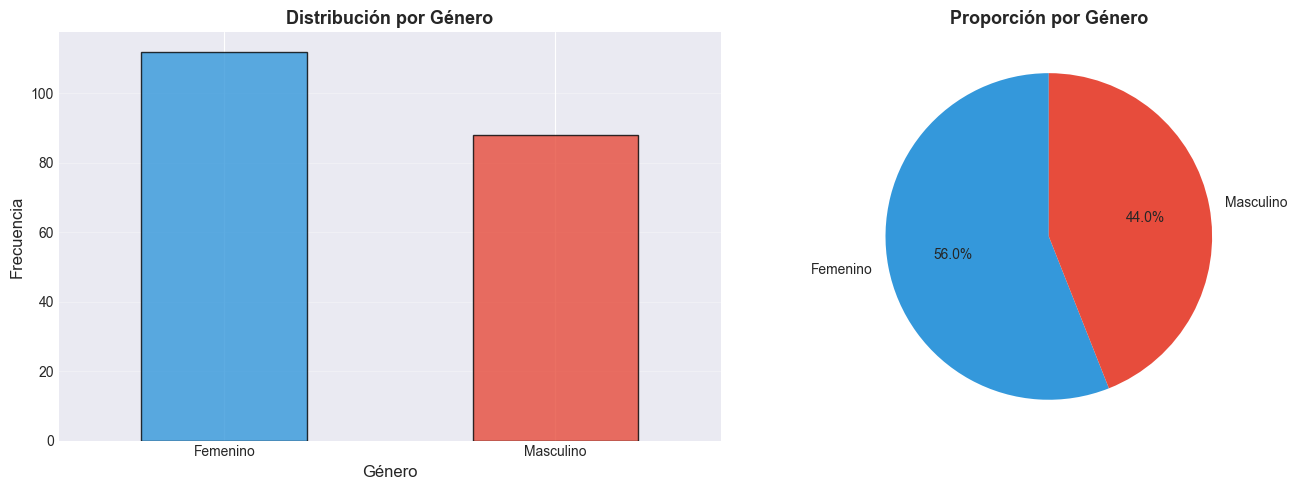

In [41]:
print("\n 3 Análisis Exploratorio de Datos (EDA)")

# Distribución de género
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df['Genero'].value_counts().plot(kind='bar', ax=axes[0], 
                                  color=['#3498db', '#e74c3c'], 
                                  edgecolor='black', alpha=0.8)
axes[0].set_xlabel('Género', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)
axes[0].set_title('Distribución por Género', fontsize=13, fontweight='bold')
axes[0].set_xticklabels(['Femenino', 'Masculino'], rotation=0)
axes[0].grid(True, alpha=0.3, axis='y')

df['Genero'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%',
                                  colors=['#3498db', '#e74c3c'], startangle=90,
                                  labels=['Femenino', 'Masculino'])
axes[1].set_ylabel('')
axes[1].set_title('Proporción por Género', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

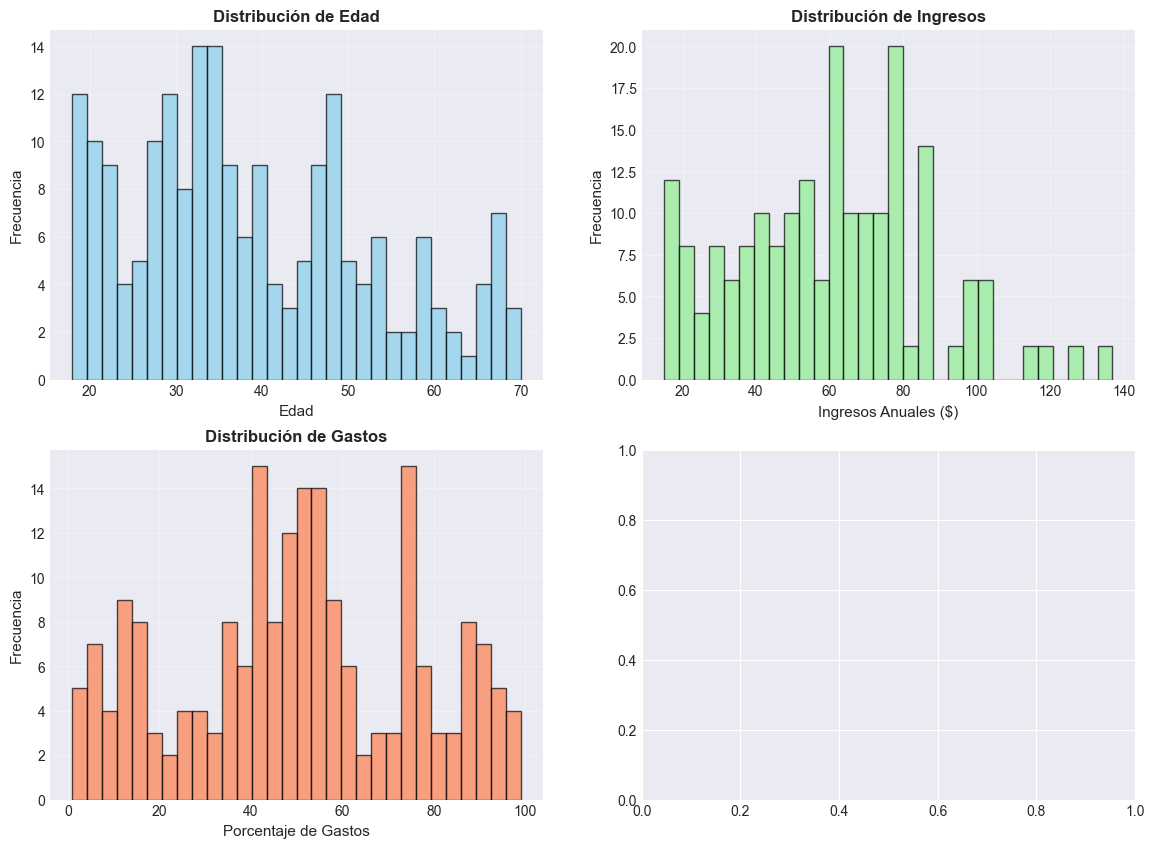

In [42]:
# Distribuciones de variables numéricas
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].hist(df['Edad'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Edad', fontsize=11)
axes[0, 0].set_ylabel('Frecuencia', fontsize=11)
axes[0, 0].set_title('Distribución de Edad', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].hist(df['Ingresos Anuales ($)'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Ingresos Anuales ($)', fontsize=11)
axes[0, 1].set_ylabel('Frecuencia', fontsize=11)
axes[0, 1].set_title('Distribución de Ingresos', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].hist(df['Porcentajde de gastos (1-100)'], bins=30, color='coral', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Porcentaje de Gastos', fontsize=11)
axes[1, 0].set_ylabel('Frecuencia', fontsize=11)
axes[1, 0].set_title('Distribución de Gastos', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

In [43]:
bp = axes[1, 1].boxplot([df['Edad'], df['Ingresos Anuales ($)']/1000, 
                          df['Porcentajde de gastos (1-100)']], 
                         labels=['Edad', 'Ingresos\n(miles)', 'Gastos'],
                         patch_artist=True)
for patch, color in zip(bp['boxes'], ['skyblue', 'lightgreen', 'coral']):
    patch.set_facecolor(color)
axes[1, 1].set_ylabel('Valor', fontsize=11)
axes[1, 1].set_title('Boxplots de Variables', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

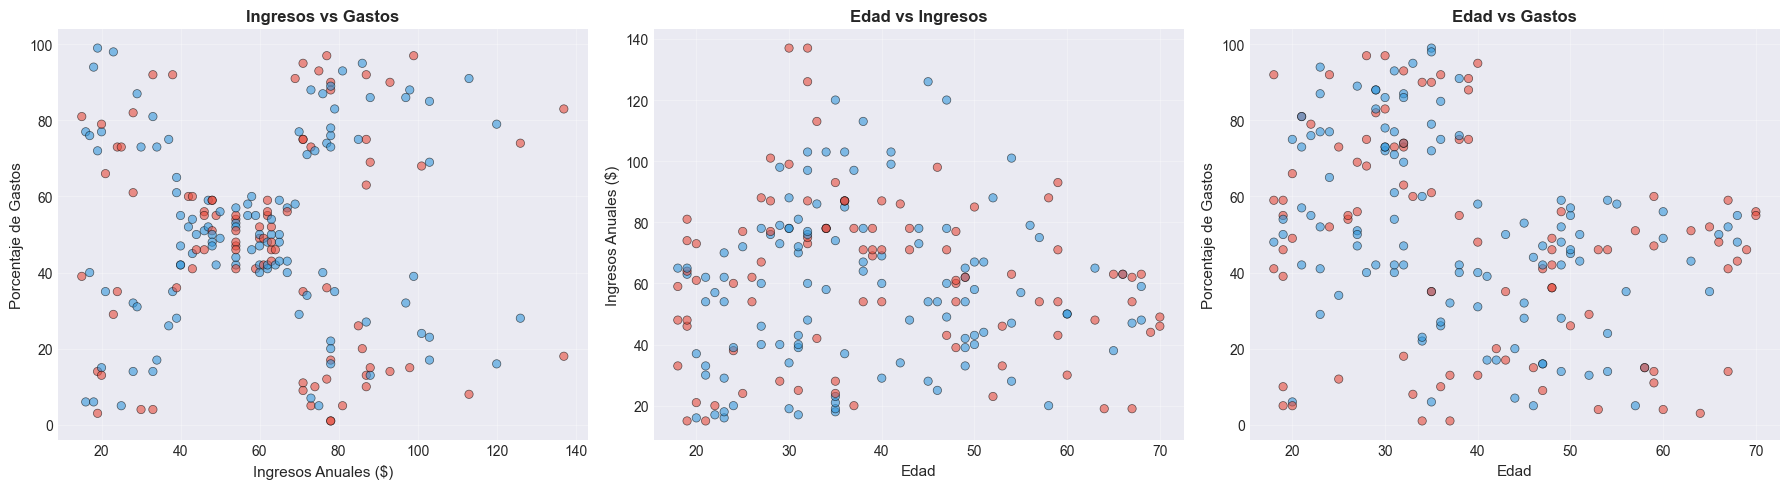

In [44]:
# Scatter plots para visualizar relaciones
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Ingresos vs Gastos (coloreado por género)
colors = ['#3498db' if g == 'Female' else '#e74c3c' for g in df['Genero']]
axes[0].scatter(df['Ingresos Anuales ($)'], df['Porcentajde de gastos (1-100)'],
                c=colors, alpha=0.6, edgecolors='black', linewidth=0.5)
axes[0].set_xlabel('Ingresos Anuales ($)', fontsize=11)
axes[0].set_ylabel('Porcentaje de Gastos', fontsize=11)
axes[0].set_title('Ingresos vs Gastos', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Edad vs Ingresos
axes[1].scatter(df['Edad'], df['Ingresos Anuales ($)'],
                c=colors, alpha=0.6, edgecolors='black', linewidth=0.5)
axes[1].set_xlabel('Edad', fontsize=11)
axes[1].set_ylabel('Ingresos Anuales ($)', fontsize=11)
axes[1].set_title('Edad vs Ingresos', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Edad vs Gastos
axes[2].scatter(df['Edad'], df['Porcentajde de gastos (1-100)'],
                c=colors, alpha=0.6, edgecolors='black', linewidth=0.5)
axes[2].set_xlabel('Edad', fontsize=11)
axes[2].set_ylabel('Porcentaje de Gastos', fontsize=11)
axes[2].set_title('Edad vs Gastos', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


 4 Matriz de Correlación


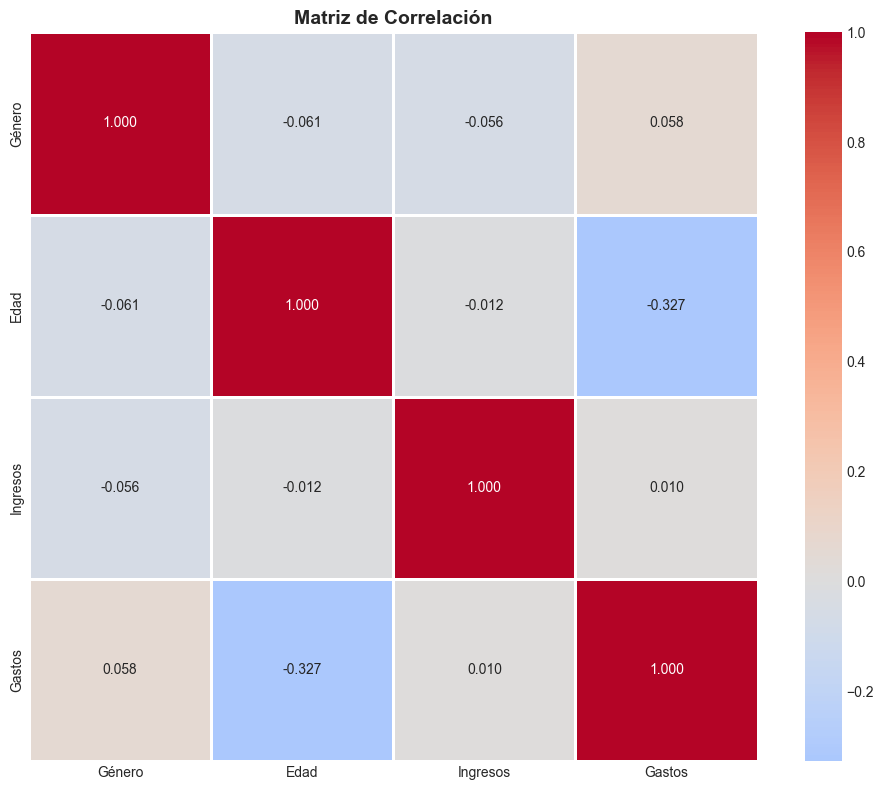

In [45]:
print("\n 4 Matriz de Correlación")
# Convertir género a numérico para correlación
df_numeric = df.copy()
df_numeric['Genero_num'] = df_numeric['Genero'].map({'Male': 0, 'Female': 1})

plt.figure(figsize=(10, 8))
correlation_matrix = df_numeric[['Genero_num', 'Edad', 'Ingresos Anuales ($)', 
                                  'Porcentajde de gastos (1-100)']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm',
            square=True, linewidths=1, center=0,
            xticklabels=['Género', 'Edad', 'Ingresos', 'Gastos'],
            yticklabels=['Género', 'Edad', 'Ingresos', 'Gastos'])
plt.title('Matriz de Correlación', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [46]:
print("\n 5 Preparación de datos para clustering")


 5 Preparación de datos para clustering


In [47]:
features_clustering = ['Edad', 'Ingresos Anuales ($)', 'Porcentajde de gastos (1-100)']
X = df[features_clustering].values

print(f"\nFeatures seleccionadas para clustering:")
for feature in features_clustering:
    print(f"  - {feature}")

print(f"\nShape de los datos: {X.shape}")

# Normalización de datos (CRÍTICO para K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\n Datos normalizados con StandardScaler")
print("\nEstadísticas después de normalización:")
print(f"  Media: {X_scaled.mean(axis=0)}")
print(f"  Desviación estándar: {X_scaled.std(axis=0)}")


Features seleccionadas para clustering:
  - Edad
  - Ingresos Anuales ($)
  - Porcentajde de gastos (1-100)

Shape de los datos: (200, 3)

 Datos normalizados con StandardScaler

Estadísticas después de normalización:
  Media: [-1.02140518e-16 -2.13162821e-16 -1.46549439e-16]
  Desviación estándar: [1. 1. 1.]


In [48]:
# 6. MÉTODO DEL CODO
print("\n" + "=" * 60)
print(" 6 OPTIMIZACIÓN: MÉTODO DEL CODO")

inertias = []
k_range = range(2, 11)

print("\nCalculando inercia para k de 2 a 10...")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    print(f"  k={k}: Inercia = {kmeans.inertia_:.2f}")


 6 OPTIMIZACIÓN: MÉTODO DEL CODO

Calculando inercia para k de 2 a 10...
  k=2: Inercia = 389.39
  k=3: Inercia = 295.21
  k=4: Inercia = 205.23
  k=5: Inercia = 168.25
  k=6: Inercia = 133.87
  k=7: Inercia = 117.01
  k=8: Inercia = 103.87
  k=9: Inercia = 93.09
  k=10: Inercia = 82.39


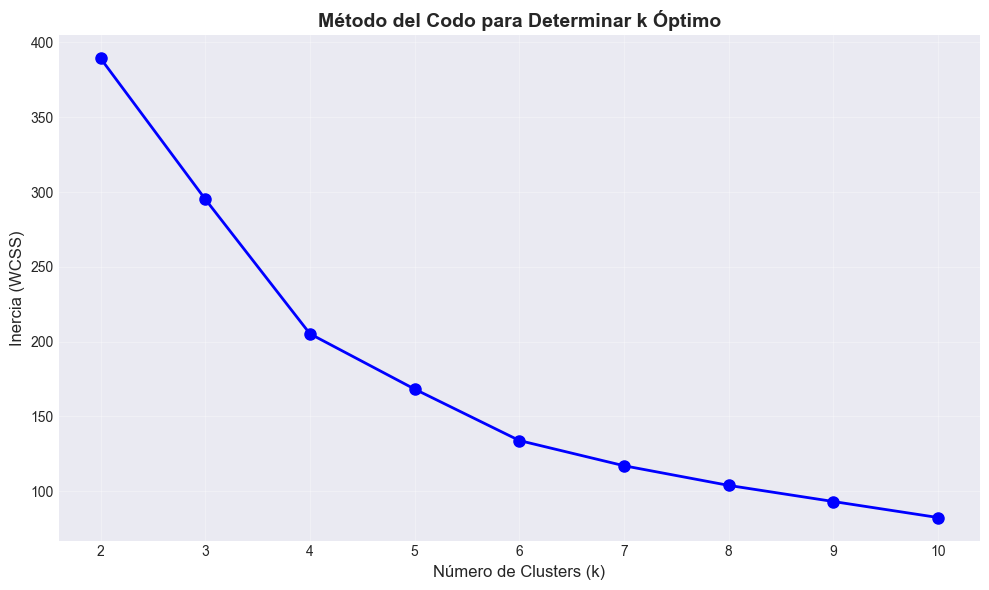

In [49]:
# Gráfica del método del codo
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Número de Clusters (k)', fontsize=12)
plt.ylabel('Inercia (WCSS)', fontsize=12)
plt.title('Método del Codo para Determinar k Óptimo', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(k_range)
plt.tight_layout()
plt.show()

In [50]:
print("\n" + "=" * 60)
print(" 7 OPTIMIZACIÓN: COEFICIENTE DE SILHOUETTE")


 7 OPTIMIZACIÓN: COEFICIENTE DE SILHOUETTE


In [51]:
# Calcular silhouette score para diferentes k
silhouette_scores = []

print("\nCalculando Silhouette Score para k de 2 a 10...")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f"  k={k}: Silhouette Score = {score:.4f}")


Calculando Silhouette Score para k de 2 a 10...
  k=2: Silhouette Score = 0.3355
  k=3: Silhouette Score = 0.3578
  k=4: Silhouette Score = 0.4040
  k=5: Silhouette Score = 0.4166
  k=6: Silhouette Score = 0.4284
  k=7: Silhouette Score = 0.4172
  k=8: Silhouette Score = 0.4082
  k=9: Silhouette Score = 0.4177
  k=10: Silhouette Score = 0.4066


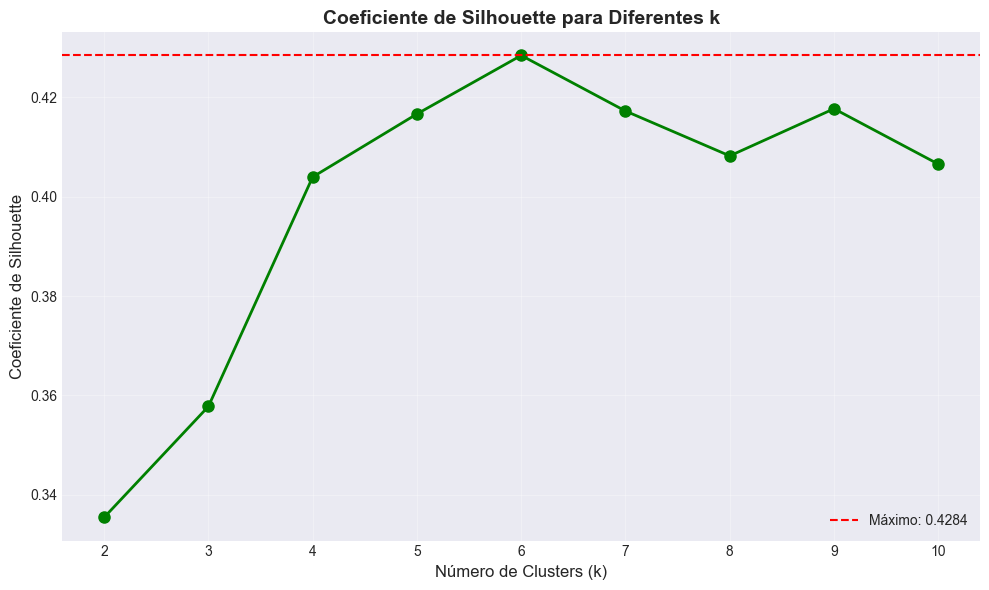

In [52]:
# Gráfica de silhouette
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
plt.xlabel('Número de Clusters (k)', fontsize=12)
plt.ylabel('Coeficiente de Silhouette', fontsize=12)
plt.title('Coeficiente de Silhouette para Diferentes k', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(k_range)
plt.axhline(y=max(silhouette_scores), color='r', linestyle='--', 
            label=f'Máximo: {max(silhouette_scores):.4f}')
plt.legend()
plt.tight_layout()
plt.show()

In [53]:
# Encontrar k óptimo
k_optimo = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"\n K óptimo según Silhouette: {k_optimo}")


 K óptimo según Silhouette: 6


In [54]:
print("\n" + "=" * 60)
print(" 8 OTRAS MÉTRICAS DE CLUSTERING")


 8 OTRAS MÉTRICAS DE CLUSTERING



Calculando métricas adicionales...


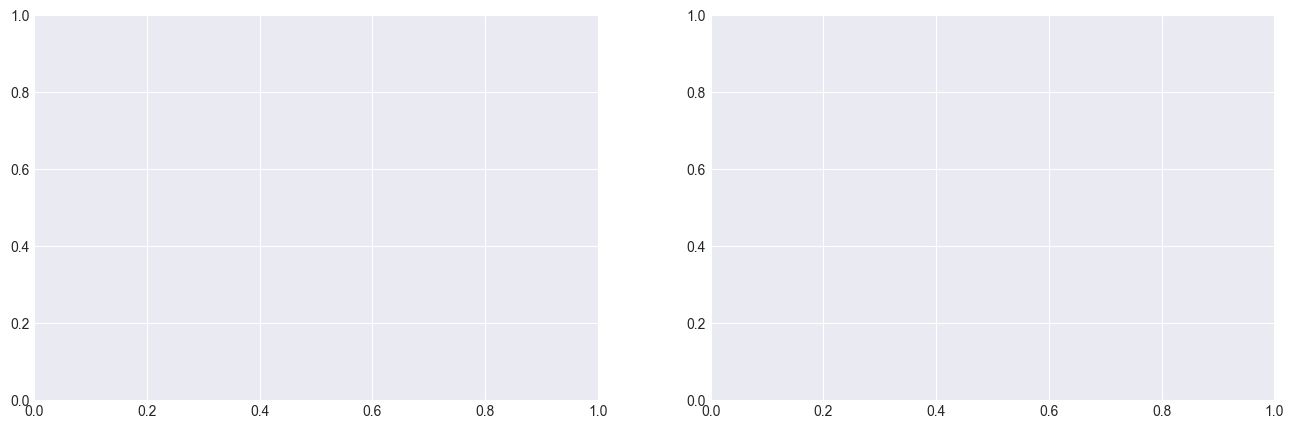

In [55]:
calinski_scores = []
davies_bouldin_scores = []

print("\nCalculando métricas adicionales...")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    
    cal_score = calinski_harabasz_score(X_scaled, labels)
    db_score = davies_bouldin_score(X_scaled, labels)
    
    calinski_scores.append(cal_score)
    davies_bouldin_scores.append(db_score)

# Visualizar métricas
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

In [56]:
# Calinski-Harabasz (mayor es mejor)
axes[0].plot(k_range, calinski_scores, 'mo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Número de Clusters (k)', fontsize=12)
axes[0].set_ylabel('Calinski-Harabasz Score', fontsize=12)
axes[0].set_title('Calinski-Harabasz Index (Mayor = Mejor)', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(k_range)

# Davies-Bouldin (menor es mejor)
axes[1].plot(k_range, davies_bouldin_scores, 'co-', linewidth=2, markersize=8)
axes[1].set_xlabel('Número de Clusters (k)', fontsize=12)
axes[1].set_ylabel('Davies-Bouldin Score', fontsize=12)
axes[1].set_title('Davies-Bouldin Index (Menor = Mejor)', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(k_range)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [57]:
# Tabla resumen de métricas
print("\nRESUMEN DE MÉTRICAS POR K:")
metricas_df = pd.DataFrame({
    'k': list(k_range),
    'Inercia': inertias,
    'Silhouette': silhouette_scores,
    'Calinski-Harabasz': calinski_scores,
    'Davies-Bouldin': davies_bouldin_scores
})
display(metricas_df)


RESUMEN DE MÉTRICAS POR K:


,k,Inercia,Silhouette,Calinski-Harabasz,Davies-Bouldin
0,2,389.386189,0.335472,107.095567,1.260682
1,3,295.212246,0.357793,101.694947,1.050270
2,4,205.225147,0.403958,125.676397,0.930796
3,5,168.247580,0.416643,125.100940,0.874551
4,6,133.868421,0.428417,135.102104,0.825354
5,7,117.011555,0.417232,132.774309,0.793467
6,8,103.873292,0.408207,131.006216,0.891783
7,9,93.092891,0.417693,130.003560,0.819844
8,10,82.385154,0.406554,132.638273,0.867904


In [58]:
# 9. MODELO FINAL OPTIMIZADO
print("\n" + "=" * 60)
print(" 9 MODELO FINAL CON K ÓPTIMO")

print(f"\nEntrenando modelo final con k={k_optimo}...")

# Modelo K-Means con k óptimo
kmeans_final = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
df['Cluster'] = kmeans_final.fit_predict(X_scaled)

print(f" Modelo K-Means entrenado con {k_optimo} clusters")


 9 MODELO FINAL CON K ÓPTIMO

Entrenando modelo final con k=6...
 Modelo K-Means entrenado con 6 clusters


In [59]:
# Métricas del modelo final
silhouette_final = silhouette_score(X_scaled, df['Cluster'])
calinski_final = calinski_harabasz_score(X_scaled, df['Cluster'])
davies_bouldin_final = davies_bouldin_score(X_scaled, df['Cluster'])

print("\n MÉTRICAS DEL MODELO FINAL:")
print(f"  Silhouette Score      : {silhouette_final:.4f}")
print(f"  Calinski-Harabasz     : {calinski_final:.2f}")
print(f"  Davies-Bouldin        : {davies_bouldin_final:.4f}")
print(f"  Inercia (WCSS)        : {kmeans_final.inertia_:.2f}")

print("\nDistribución de clientes por cluster:")
print(df['Cluster'].value_counts().sort_index())


 MÉTRICAS DEL MODELO FINAL:
  Silhouette Score      : 0.4284
  Calinski-Harabasz     : 135.10
  Davies-Bouldin        : 0.8254
  Inercia (WCSS)        : 133.87

Distribución de clientes por cluster:
Cluster
0    45
1    39
2    33
3    39
4    23
5    21
Name: count, dtype: int64


In [60]:
print("\n 10 Análisis de características por cluster")


 10 Análisis de características por cluster


In [61]:
# Estadísticas por cluster
cluster_stats = df.groupby('Cluster')[features_clustering].agg(['mean', 'std'])
print("\nEstadísticas por cluster:")
display(cluster_stats)

# Perfil detallado de cada cluster
print("\nPERFIL DE CADA CLUSTER:")
for cluster in range(k_optimo):
    cluster_data = df[df['Cluster'] == cluster]
    print(f"\n{'='*50}")
    print(f"CLUSTER {cluster} ({len(cluster_data)} clientes)")
    print(f"{'='*50}")
    print(f"  Edad promedio: {cluster_data['Edad'].mean():.1f} años")
    print(f"  Ingresos promedio: ${cluster_data['Ingresos Anuales ($)'].mean():,.0f}")
    print(f"  Gastos promedio: {cluster_data['Porcentajde de gastos (1-100)'].mean():.1f}")
    print(f"  Género predominante: {cluster_data['Genero'].mode()[0]}")


Estadísticas por cluster:


Edad            Ingresos Anuales ($)             \
              mean        std                 mean        std   
Cluster                                                         
0        56.333333   8.453079            54.266667   8.975725   
1        26.794872   7.056835            57.102564  10.161317   
2        41.939394  10.179450            88.939394  16.586778   
3        32.692308   3.728650            86.538462  16.312485   
4        25.000000   5.300086            25.260870   7.723738   
5        45.523810  11.766984            26.285714   7.437357   

        Porcentajde de gastos (1-100)             
                                 mean        std  
Cluster                                           
0                           49.066667   6.300794  
1                           48.128205   9.966205  
2                           16.969697   9.960813  
3                           82.128205   9.364489  
4                           77.608696  13.272457  
5                           19.380952  12.555780


PERFIL DE CADA CLUSTER:

CLUSTER 0 (45 clientes)
  Edad promedio: 56.3 años
  Ingresos promedio: $54
  Gastos promedio: 49.1
  Género predominante: Female

CLUSTER 1 (39 clientes)
  Edad promedio: 26.8 años
  Ingresos promedio: $57
  Gastos promedio: 48.1
  Género predominante: Female

CLUSTER 2 (33 clientes)
  Edad promedio: 41.9 años
  Ingresos promedio: $89
  Gastos promedio: 17.0
  Género predominante: Male

CLUSTER 3 (39 clientes)
  Edad promedio: 32.7 años
  Ingresos promedio: $87
  Gastos promedio: 82.1
  Género predominante: Female

CLUSTER 4 (23 clientes)
  Edad promedio: 25.0 años
  Ingresos promedio: $25
  Gastos promedio: 77.6
  Género predominante: Female

CLUSTER 5 (21 clientes)
  Edad promedio: 45.5 años
  Ingresos promedio: $26
  Gastos promedio: 19.4
  Género predominante: Female



 11 Visualización de clusters


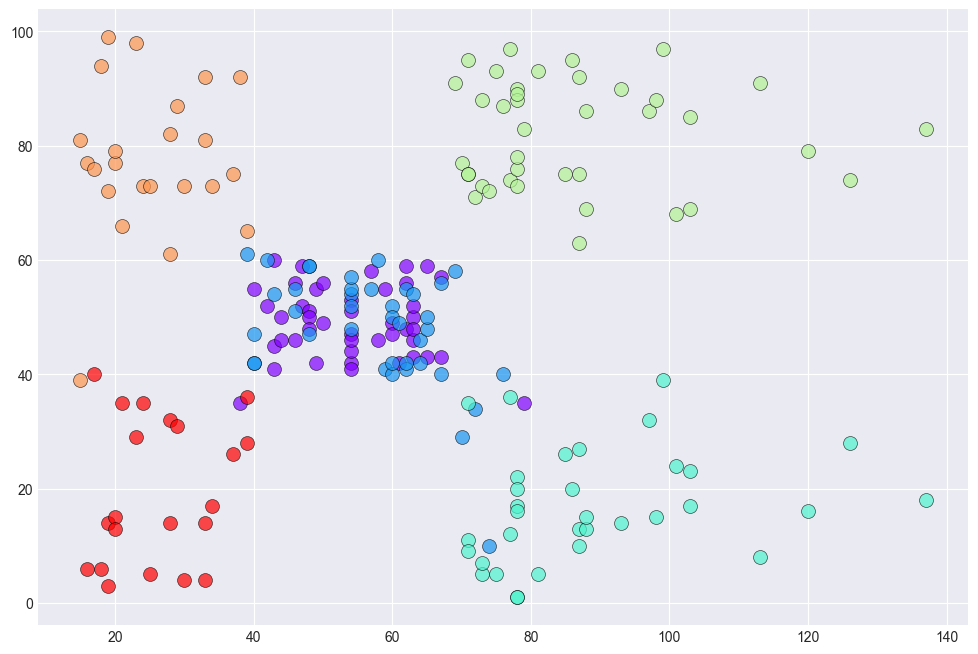

In [62]:
# 11. VISUALIZACIÓN DE CLUSTERS
print("\n 11 Visualización de clusters")

# Colores para clusters
colors_clusters = plt.cm.rainbow(np.linspace(0, 1, k_optimo))

# VISUALIZACIÓN 1: Ingresos vs Gastos
plt.figure(figsize=(12, 8))
for cluster in range(k_optimo):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Ingresos Anuales ($)'], 
                cluster_data['Porcentajde de gastos (1-100)'],
                c=[colors_clusters[cluster]], label=f'Cluster {cluster}',
                alpha=0.7, edgecolors='black', linewidth=0.5, s=100)

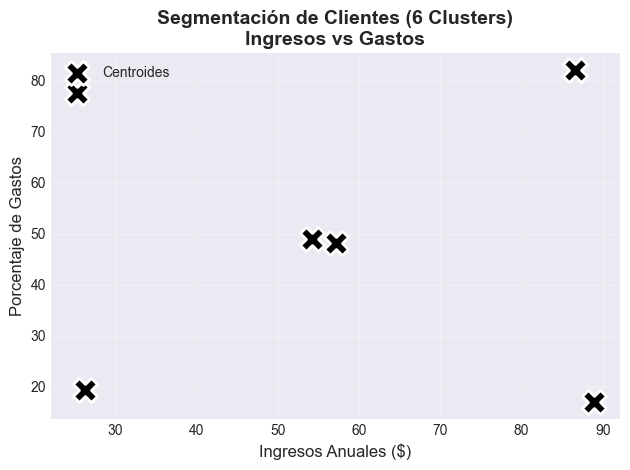

In [63]:
# Centroides
centroides_originales = scaler.inverse_transform(kmeans_final.cluster_centers_)
plt.scatter(centroides_originales[:, 1], centroides_originales[:, 2],
            c='black', marker='X', s=300, edgecolors='white', linewidth=2,
            label='Centroides', zorder=5)

plt.xlabel('Ingresos Anuales ($)', fontsize=12)
plt.ylabel('Porcentaje de Gastos', fontsize=12)
plt.title(f'Segmentación de Clientes ({k_optimo} Clusters)\nIngresos vs Gastos', 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

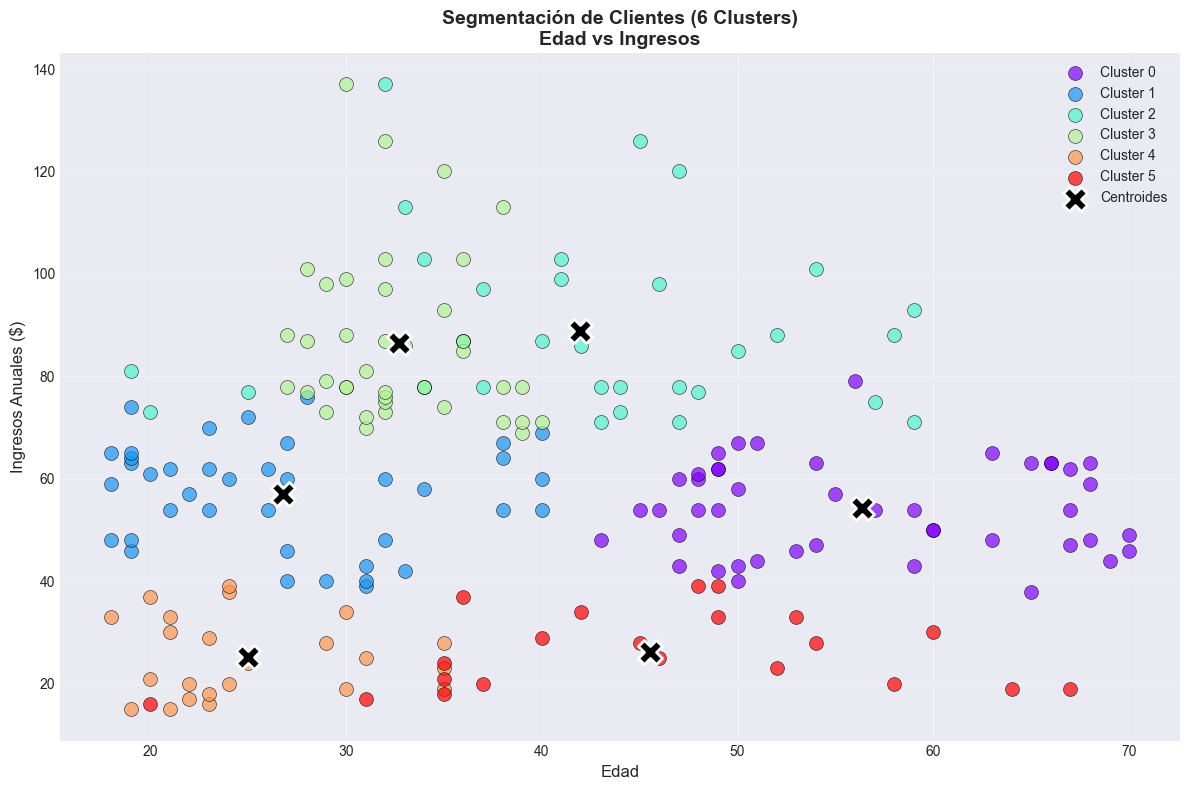

In [64]:
# VISUALIZACIÓN 2: Edad vs Ingresos
plt.figure(figsize=(12, 8))
for cluster in range(k_optimo):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Edad'], 
                cluster_data['Ingresos Anuales ($)'],
                c=[colors_clusters[cluster]], label=f'Cluster {cluster}',
                alpha=0.7, edgecolors='black', linewidth=0.5, s=100)

plt.scatter(centroides_originales[:, 0], centroides_originales[:, 1],
            c='black', marker='X', s=300, edgecolors='white', linewidth=2,
            label='Centroides', zorder=5)

plt.xlabel('Edad', fontsize=12)
plt.ylabel('Ingresos Anuales ($)', fontsize=12)
plt.title(f'Segmentación de Clientes ({k_optimo} Clusters)\nEdad vs Ingresos', 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

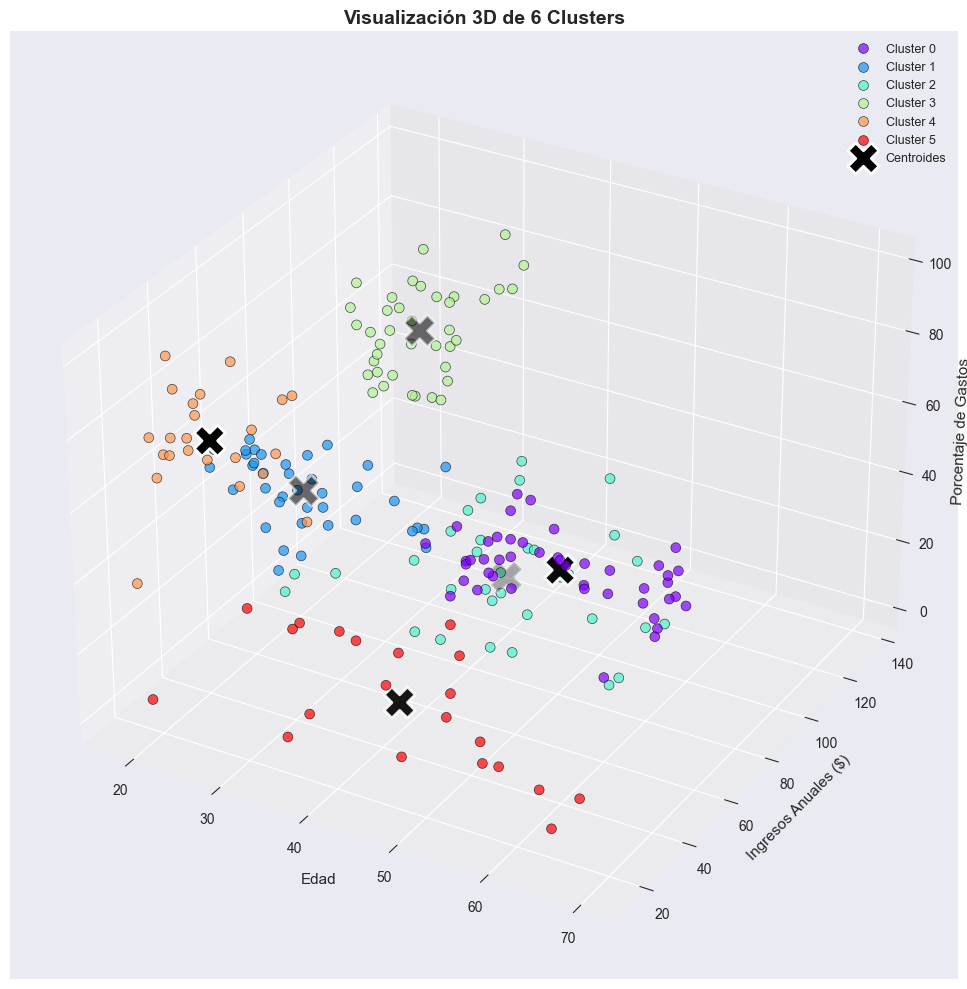

In [65]:
# VISUALIZACIÓN 3: 3D (Todas las variables)
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(k_optimo):
    cluster_data = df[df['Cluster'] == cluster]
    ax.scatter(cluster_data['Edad'],
               cluster_data['Ingresos Anuales ($)'],
               cluster_data['Porcentajde de gastos (1-100)'],
               c=[colors_clusters[cluster]], label=f'Cluster {cluster}',
               alpha=0.7, edgecolors='black', linewidth=0.5, s=50)

# Centroides en 3D
ax.scatter(centroides_originales[:, 0], 
           centroides_originales[:, 1],
           centroides_originales[:, 2],
           c='black', marker='X', s=500, edgecolors='white', linewidth=2,
           label='Centroides', zorder=5)

ax.set_xlabel('Edad', fontsize=11)
ax.set_ylabel('Ingresos Anuales ($)', fontsize=11)
ax.set_zlabel('Porcentaje de Gastos', fontsize=11)
ax.set_title(f'Visualización 3D de {k_optimo} Clusters', fontsize=14, fontweight='bold')
ax.legend(fontsize=9)
plt.tight_layout()
plt.show()


 12 Reducción con PCA para visualización 2D

Varianza explicada por componentes:
  PC1: 44.27%
  PC2: 33.31%
  Total: 77.57%


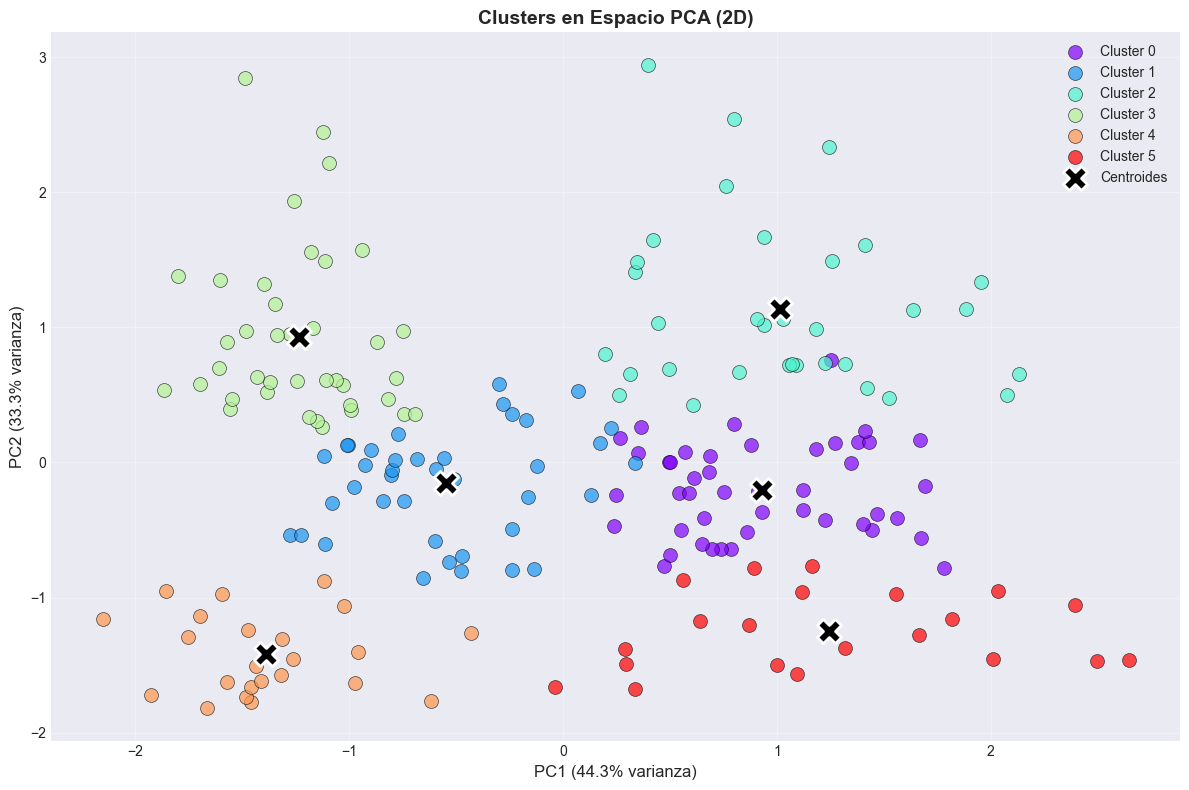

In [66]:
# VISUALIZACIÓN 4: PCA 2D
print("\n 12 Reducción con PCA para visualización 2D")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"\nVarianza explicada por componentes:")
print(f"  PC1: {pca.explained_variance_ratio_[0]*100:.2f}%")
print(f"  PC2: {pca.explained_variance_ratio_[1]*100:.2f}%")
print(f"  Total: {sum(pca.explained_variance_ratio_)*100:.2f}%")

plt.figure(figsize=(12, 8))
for cluster in range(k_optimo):
    mask = df['Cluster'] == cluster
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1],
                c=[colors_clusters[cluster]], label=f'Cluster {cluster}',
                alpha=0.7, edgecolors='black', linewidth=0.5, s=100)

# Centroides en PCA
centroides_pca = pca.transform(kmeans_final.cluster_centers_)
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
            c='black', marker='X', s=300, edgecolors='white', linewidth=2,
            label='Centroides', zorder=5)

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% varianza)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% varianza)', fontsize=12)
plt.title(f'Clusters en Espacio PCA (2D)', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

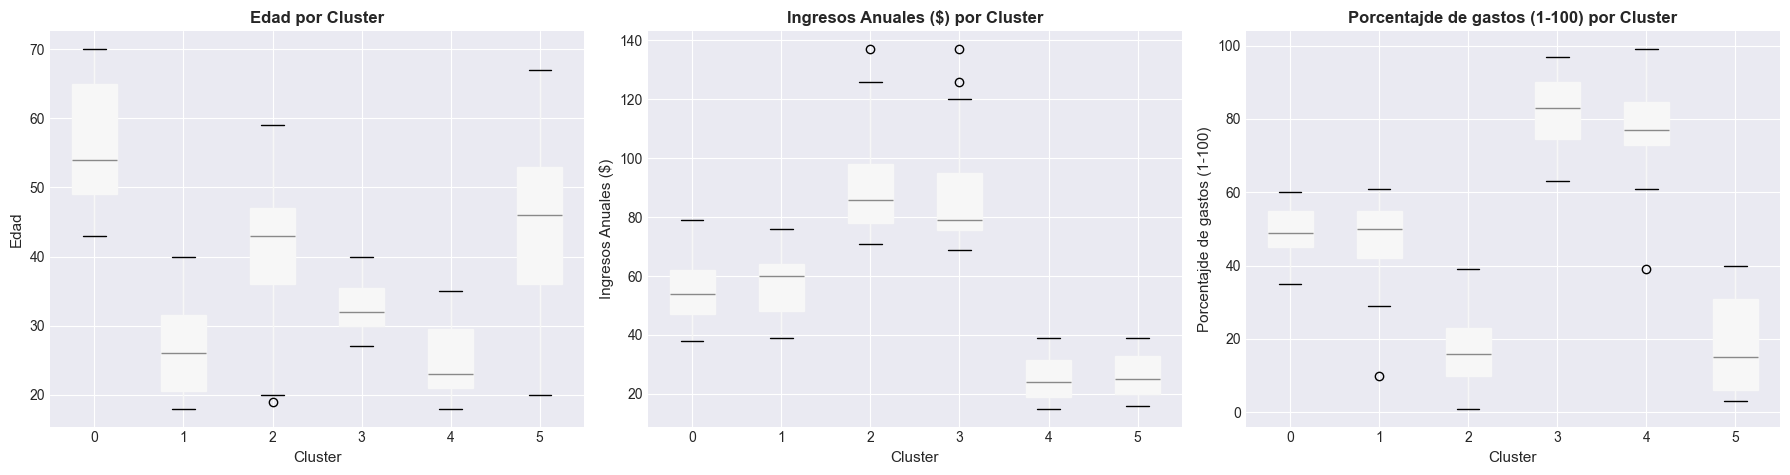

In [67]:
# VISUALIZACIÓN 5: Boxplots por cluster
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, feature in enumerate(features_clustering):
    df.boxplot(column=feature, by='Cluster', ax=axes[idx], patch_artist=True)
    axes[idx].set_xlabel('Cluster', fontsize=11)
    axes[idx].set_ylabel(feature, fontsize=11)
    axes[idx].set_title(f'{feature} por Cluster', fontsize=12, fontweight='bold')
    axes[idx].get_figure().suptitle('')

plt.tight_layout()
plt.show()

In [68]:
print("\n 13 Radar Chart de Centroides")


 13 Radar Chart de Centroides


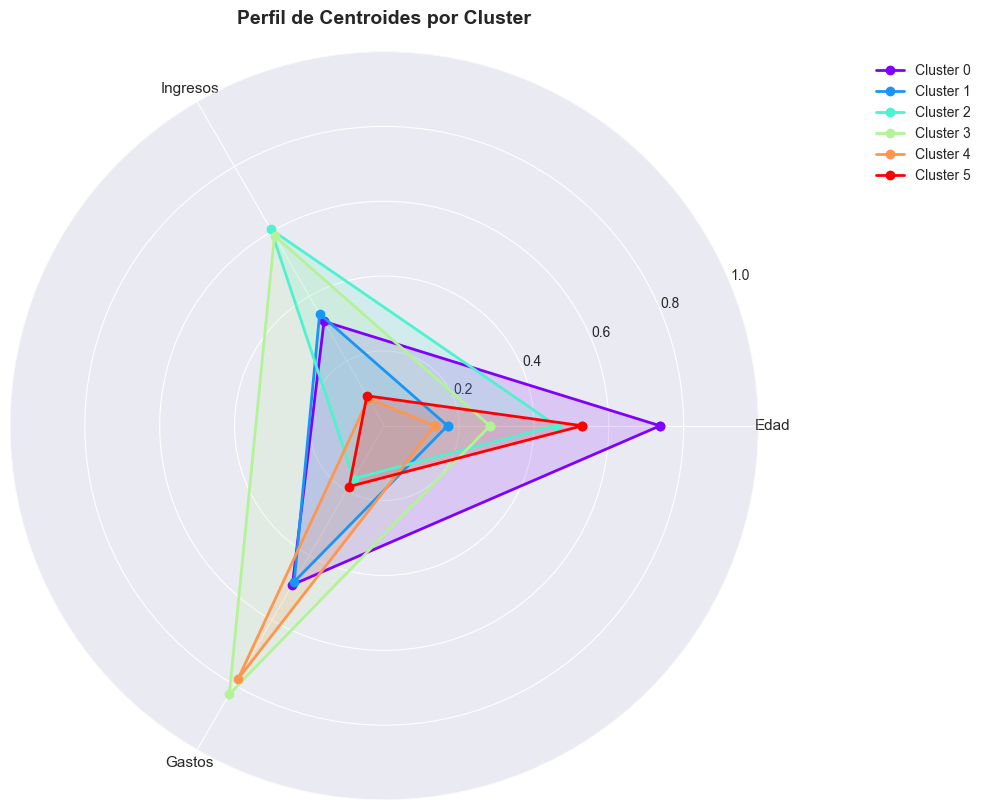

In [69]:
# Normalizar centroides para radar chart (0-1)
centroides_norm = centroides_originales.copy()
for i in range(3):
    min_val = df[features_clustering[i]].min()
    max_val = df[features_clustering[i]].max()
    centroides_norm[:, i] = (centroides_originales[:, i] - min_val) / (max_val - min_val)

# Crear radar chart
angles = np.linspace(0, 2 * np.pi, len(features_clustering), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

for cluster in range(k_optimo):
    values = centroides_norm[cluster].tolist()
    values += values[:1]
    ax.plot(angles, values, 'o-', linewidth=2, label=f'Cluster {cluster}',
            color=colors_clusters[cluster])
    ax.fill(angles, values, alpha=0.15, color=colors_clusters[cluster])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(['Edad', 'Ingresos', 'Gastos'], fontsize=11)
ax.set_ylim(0, 1)
ax.set_title('Perfil de Centroides por Cluster', fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
ax.grid(True)
plt.tight_layout()
plt.show()

In [70]:
# 14. INTERPRETACIÓN DE CLUSTERS
print(" 14 INTERPRETACIÓN Y ETIQUETADO DE CLUSTERS")

# Crear nombres descriptivos para clusters
cluster_names = {}
for cluster in range(k_optimo):
    cluster_data = df[df['Cluster'] == cluster]
    edad_prom = cluster_data['Edad'].mean()
    ingresos_prom = cluster_data['Ingresos Anuales ($)'].mean()
    gastos_prom = cluster_data['Porcentajde de gastos (1-100)'].mean()
    
    # Clasificar según características
    if ingresos_prom < 40000:
        ingreso_label = "Bajos Ingresos"
    elif ingresos_prom < 70000:
        ingreso_label = "Ingresos Medios"
    else:
        ingreso_label = "Altos Ingresos"
    
    if gastos_prom < 40:
        gasto_label = "Bajo Gasto"
    elif gastos_prom < 65:
        gasto_label = "Gasto Moderado"
    else:
        gasto_label = "Alto Gasto"
    
    cluster_names[cluster] = f"{ingreso_label} - {gasto_label}"
    
    print(f"\nCLUSTER {cluster}: {cluster_names[cluster]}")
    print(f"  Tamaño: {len(cluster_data)} clientes ({len(cluster_data)/len(df)*100:.1f}%)")
    print(f"  Edad promedio: {edad_prom:.1f} años")
    print(f"  Ingresos promedio: ${ingresos_prom:,.0f}")
    print(f"  Score de gastos: {gastos_prom:.1f}")
    print(f"  → RECOMENDACIÓN: ", end="")
    
    # Recomendaciones de negocio
    if gastos_prom > 60 and ingresos_prom > 60000:
        print("Clientes PREMIUM - Enfoque en productos exclusivos y servicios VIP")
    elif gastos_prom > 60 and ingresos_prom < 60000:
        print("Alta lealtad - Programas de fidelización y descuentos")
    elif gastos_prom < 40:
        print("Potencial de crecimiento - Estrategias de engagement y promociones")
    else:
        print("Clientes estándar - Marketing dirigido y ofertas personalizadas")



 14 INTERPRETACIÓN Y ETIQUETADO DE CLUSTERS

CLUSTER 0: Bajos Ingresos - Gasto Moderado
  Tamaño: 45 clientes (22.5%)
  Edad promedio: 56.3 años
  Ingresos promedio: $54
  Score de gastos: 49.1
  → RECOMENDACIÓN: Clientes estándar - Marketing dirigido y ofertas personalizadas

CLUSTER 1: Bajos Ingresos - Gasto Moderado
  Tamaño: 39 clientes (19.5%)
  Edad promedio: 26.8 años
  Ingresos promedio: $57
  Score de gastos: 48.1
  → RECOMENDACIÓN: Clientes estándar - Marketing dirigido y ofertas personalizadas

CLUSTER 2: Bajos Ingresos - Bajo Gasto
  Tamaño: 33 clientes (16.5%)
  Edad promedio: 41.9 años
  Ingresos promedio: $89
  Score de gastos: 17.0
  → RECOMENDACIÓN: Potencial de crecimiento - Estrategias de engagement y promociones

CLUSTER 3: Bajos Ingresos - Alto Gasto
  Tamaño: 39 clientes (19.5%)
  Edad promedio: 32.7 años
  Ingresos promedio: $87
  Score de gastos: 82.1
  → RECOMENDACIÓN: Alta lealtad - Programas de fidelización y descuentos

CLUSTER 4: Bajos Ingresos - Alto Gast

In [72]:
# 16. RESUMEN FINAL
print("\n" + "=" * 60)
print("RESUMEN FINAL")

print(f"""
 MODELO IMPLEMENTADO: K-Means Clustering

 CONFIGURACIÓN ÓPTIMA:
   • Número de clusters (k): {k_optimo}
   • Features utilizadas: {len(features_clustering)} (Edad, Ingresos, Gastos)
   • Clientes totales: {len(df)}
   
 MÉTRICAS DE CALIDAD:
   • Silhouette Score     : {silhouette_final:.4f} (Rango: -1 a 1, óptimo >0.5)
   • Calinski-Harabasz    : {calinski_final:.2f} (Mayor es mejor)
   • Davies-Bouldin       : {davies_bouldin_final:.4f} (Menor es mejor)
   • Inercia (WCSS)       : {kmeans_final.inertia_:.2f}
   
 INTERPRETACIÓN:
   {'Excelente' if silhouette_final > 0.5 else 'Buena' if silhouette_final > 0.3 else 'Aceptable'} separación entre clusters
   
 SEGMENTOS IDENTIFICADOS:
""")

for cluster in range(k_optimo):
    cluster_size = len(df[df['Cluster'] == cluster])
    print(f"   Cluster {cluster} ({cluster_names[cluster]}): {cluster_size} clientes ({cluster_size/len(df)*100:.1f}%)")

print(f"""
   
 CONCLUSIÓN:
   Se identificaron {k_optimo} segmentos de clientes con características distintivas
   basados en edad, ingresos y comportamiento de gasto. Este análisis permite
   estrategias de marketing personalizadas para cada segmento.
   
 APLICACIÓN DE NEGOCIO:
   - Segmentación para campañas de marketing dirigidas
   - Identificación de clientes de alto valor
   - Personalización de ofertas y productos
   - Estrategias de retención diferenciadas por segmento
""")

print(" ANÁLISIS COMPLETADO EXITOSAMENTE")


RESUMEN FINAL

 MODELO IMPLEMENTADO: K-Means Clustering

 CONFIGURACIÓN ÓPTIMA:
   • Número de clusters (k): 6
   • Features utilizadas: 3 (Edad, Ingresos, Gastos)
   • Clientes totales: 200

 MÉTRICAS DE CALIDAD:
   • Silhouette Score     : 0.4284 (Rango: -1 a 1, óptimo >0.5)
   • Calinski-Harabasz    : 135.10 (Mayor es mejor)
   • Davies-Bouldin       : 0.8254 (Menor es mejor)
   • Inercia (WCSS)       : 133.87

 INTERPRETACIÓN:
   Buena separación entre clusters

 SEGMENTOS IDENTIFICADOS:

   Cluster 0 (Bajos Ingresos - Gasto Moderado): 45 clientes (22.5%)
   Cluster 1 (Bajos Ingresos - Gasto Moderado): 39 clientes (19.5%)
   Cluster 2 (Bajos Ingresos - Bajo Gasto): 33 clientes (16.5%)
   Cluster 3 (Bajos Ingresos - Alto Gasto): 39 clientes (19.5%)
   Cluster 4 (Bajos Ingresos - Alto Gasto): 23 clientes (11.5%)
   Cluster 5 (Bajos Ingresos - Bajo Gasto): 21 clientes (10.5%)

 ARCHIVOS GENERADOS PARA REPOSITORIO:
   • modelo_clustering_clientes.pkl ← Modelo K-Means
   • scaler_clust